# **Hand Written Bengali Number Regongnition**

Our Approach
1. Build a digit(0-9) classifier using a CNN architecture.
2. Apply character segmentation for the handwritten number image.
3. Classify each segmented digit and then get the final number in the image.

In [ ]:
# !pip install imutils
# pip install numpy
# !pip install pandas
# !pip install keras
# !pip install tensorflow
# !pip install opencv-python
# !pip install matplotlib
# !pip install sklearn
# !pip install seaborn

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [2]:
dir = "D:\\4th_year_1st_semester\\AI-ML-LAB\Handwritten-Bangla-Number-Recognition-OCR\\Dataset"
train_data = []
val_data = []
img_size = 32
for i in os.listdir(dir):
    sub_directory = os.path.join(dir,i)
    counter=0
    for j in os.listdir(sub_directory):
        if counter%5!=0:
            img = cv2.imread(os.path.join(sub_directory,j),0)
            img = cv2.resize(img,(img_size,img_size))
            train_data.append([img,i])
        else:
            img = cv2.imread(os.path.join(sub_directory,j),0)
            img = cv2.resize(img,(img_size,img_size))
            val_data.append([img,i])
        counter=counter+1

print("Number of Training Data : ",len(train_data))
print("Number of validation Data : ",len(val_data))

Number of Training Data :  24546
Number of validation Data :  6141


In [3]:
random.shuffle(train_data)
random.shuffle(val_data)

In [4]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [5]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [6]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [7]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [8]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [9]:
print("Training dataset shape",train_X.shape,val_X.shape)
print("Training dataset shape",train_Y.shape,val_Y.shape)

Training dataset shape (24546, 32, 32, 1) (6141, 32, 32, 1)
Training dataset shape (24546, 10) (6141, 10)


In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [12]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [13]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
768/768 [==============================] - 27s 34ms/step - loss: 0.5673 - accuracy: 0.8080 - val_loss: 0.2987 - val_accuracy: 0.8976
Epoch 2/50
768/768 [==============================] - 26s 34ms/step - loss: 0.2744 - accuracy: 0.9065 - val_loss: 0.2214 - val_accuracy: 0.9243
Epoch 3/50
768/768 [==============================] - 27s 35ms/step - loss: 0.2021 - accuracy: 0.9308 - val_loss: 0.1617 - val_accuracy: 0.9453
Epoch 4/50
768/768 [==============================] - 27s 35ms/step - loss: 0.1594 - accuracy: 0.9447 - val_loss: 0.1315 - val_accuracy: 0.9564
Epoch 5/50
768/768 [==============================] - 27s 36ms/step - loss: 0.1326 - accuracy: 0.9551 - val_loss: 0.1196 - val_accuracy: 0.9622
Epoch 6/50
768/768 [==============================] - 33s 43ms/step - loss: 0.1110 - accuracy: 0.9605 - val_loss: 0.1060 - val_accuracy: 0.9652
Epoch 7/50
768/768 [==============================] - 45s 58ms/step - loss: 0.0952 - accuracy: 0.9674 - val_loss: 0.0979 - val_accuracy:

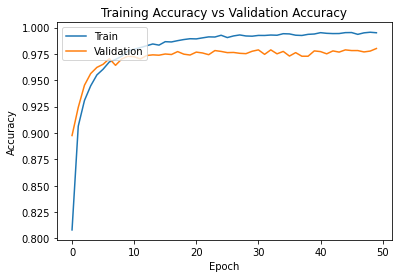

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

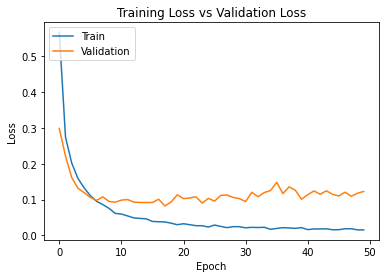

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [25]:
def get_degits(img):
    digits = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("Gray scale",gray)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        digits.append(x)
    return digits, image


In [26]:
def get_number(digit):
    number = "".join(digit)
    return number

Gray scale [[150 150 150 ... 140 140 141]
 [150 150 150 ... 140 140 139]
 [150 150 150 ... 140 140 139]
 ...
 [146 146 146 ... 143 143 142]
 [146 146 146 ... 143 143 142]
 [146 146 146 ... 143 143 142]]
1/1 [==============================] - 0s 35ms/step
2017331091


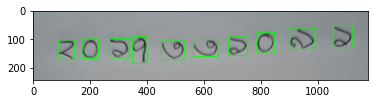

In [27]:
digit,image = get_degits("D:\\4th_year_1st_semester\\AI-ML-LAB\\Handwritten-Bangla-Number-Recognition-OCR\\evaluation\\2017331091.jpeg")
number = get_number(digit)
print(number)
plt.imshow(image)

1/1 [==============================] - 0s 25ms/step
2017331024


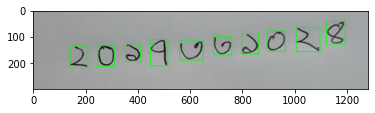

In [20]:
digit,image = get_degits("D:\\4th_year_1st_semester\\AI-ML-LAB\\Handwritten-Bangla-Number-Recognition-OCR\\evaluation\\2017331024.jpeg")
number = get_number(digit)
print(number)
plt.imshow(image)

In [21]:
digit,image = get_degits("D:\\4th_year_1st_semester\\AI-ML-LAB\\Handwritten-Bangla-Number-Recognition-OCR\\evaluation\\2019331012_1.jpeg")
number = get_number(digit)
print(number)
plt.imshow(image)

1/1 [==============================] - 0s 25ms/step


TypeError: can only concatenate str (not "int") to str

1/1 [==============================] - 0s 23ms/step
6000444882082295082369840284090


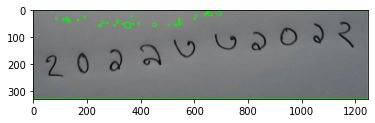

In [45]:
digit,image = get_degits("D:\\4th_year_1st_semester\\AI-ML-LAB\\Handwritten-Bangla-Number-Recognition-OCR\\evaluation\\2019331012_2.jpeg")
number = get_number(digit)
print(number)
plt.imshow(image)